In [1]:
from inspect_ai.analysis.beta import samples_df

df = samples_df("assets/2025-07-30T18-42-38+00-00_mmlu_ZYEnfbu3nstBuwzjiAGzuG.eval")

In [2]:
df.head()

,sample_id,eval_id,id,epoch,input,target,metadata_subject,score_choice,model_usage,total_time,working_time,error,limit,retries
0,eFEgQtUivSrjjeSixGbhST,4BDAxLL9NuXrrTvX5UqUHE,1,1,user: A photocell of work function ϕ = 2eV is ...,D,high_school_physics,C,"{""openai/gpt-4"": {""input_tokens"": 142, ""output...",2.82,2.82,,<NA>,0
1,8UVja2TYGe2iPL96CVLVcJ,4BDAxLL9NuXrrTvX5UqUHE,2,1,user: What is ethical hacking?,B,computer_security,C,"{""openai/gpt-4"": {""input_tokens"": 128, ""output...",2.857,2.857,,<NA>,0
2,XLFo3b3HWenedvv7JRzFCc,4BDAxLL9NuXrrTvX5UqUHE,8,1,user: Which of the following is the body cavit...,B,anatomy,C,"{""openai/gpt-4"": {""input_tokens"": 85, ""output_...",2.754,2.754,,<NA>,0
3,ECdQcbaGMqDQVc2Du8wu5B,4BDAxLL9NuXrrTvX5UqUHE,3,1,user: If the government subsidizes producers i...,C,high_school_microeconomics,C,"{""openai/gpt-4"": {""input_tokens"": 98, ""output_...",2.949,2.949,,<NA>,0
4,iRRjGetnmmsF4GX98Ub7ji,4BDAxLL9NuXrrTvX5UqUHE,6,1,user: Simplify and write the result with a rat...,D,high_school_mathematics,C,"{""openai/gpt-4"": {""input_tokens"": 122, ""output...",2.898,2.898,,<NA>,0


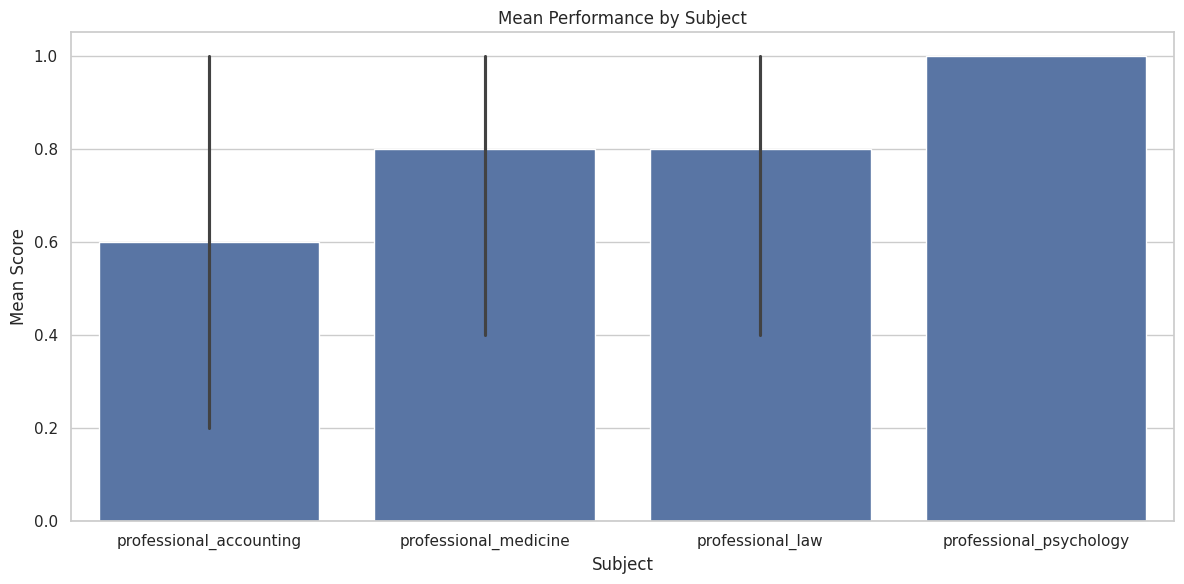

In [8]:
# Convert 'score_choice' to numeric, 1 if 'C' else 0
df['score_num'] = df['score_choice'].apply(lambda x: 1 if x == 'C' else 0)

# Filter rows where 'metadata_subject' starts with professional
df = df[df['metadata_subject'].str.startswith('professional')]

# Plot a bar chart with mean performance by metadata_subject
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.barplot(x='metadata_subject', y='score_num', data=df)
plt.title('Mean Performance by Subject')
plt.xlabel('Subject')
plt.ylabel('Mean Score')
plt.tight_layout()
plt.show()